<a href="https://colab.research.google.com/github/dashami1999/ML-miniproject-/blob/master/MainProjectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/My Drive/hotel sentimental analysis/test.csv')

In [ ]:
df.shape

(29404, 5)

In [ ]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile,happy
1,id80133,not satisfied,InternetExplorer,Desktop,not happy
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet,happy
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile,happy
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile,happy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29404 entries, 0 to 29403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       29404 non-null  object
 1   Description   29404 non-null  object
 2   Browser_Used  29404 non-null  object
 3   Device_Used   29404 non-null  object
 4   Is_Response   29404 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [ ]:
df.describe().transpose()

,count,unique,top,freq
User_ID,29404,29404,id104381,1
Description,29404,26851,too expensive,1985
Browser_Used,29404,11,Firefox,5676
Device_Used,29404,3,Desktop,11349
Is_Response,29404,3,happy,26865


In [ ]:
####checking missing value in the dataset
count = df.isnull().sum().sort_values(ascending= False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis = 1,
keys = ['count','percentage'])

print('count and percentage of missing values for the columns:')

missing_data

count and percentage of missing values for the columns:


,count,percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


percentage for default

happy        91.37
not happy     6.79
neutral       1.84
Name: Is_Response, dtype: float64


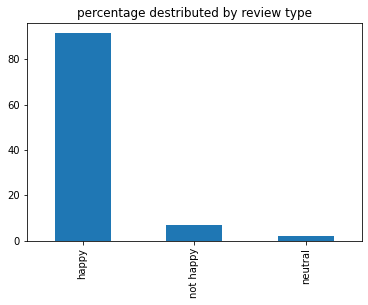

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print('percentage for default\n')
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind = 'bar')
plt.title('percentage destributed by review type')
plt.show()

In [ ]:
df.drop(columns = ['User_ID','Browser_Used','Device_Used'],inplace=True)

In [ ]:
import re
import string


def text_clean_1(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  return text

cleaned1 = lambda x: text_clean_1(x)


In [ ]:
df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,Looking for a motel in close proximity to TV t...,happy,looking for a motel in close proximity to tv t...
1,not satisfied,not happy,not satisfied
2,Visited Seattle on business. Spent - nights in...,happy,visited seattle on business spent nights in t...
3,This hotel location is excellent and the rooms...,happy,this hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...,happy,this hotel is awesome i love the service antho...
5,"most expensive , not worth",not happy,most expensive not worth
6,What a pleasant place to stay!\nThe hotel is b...,happy,what a pleasant place to stay\nthe hotel is be...
7,I booked out the same day I arrived. It cost m...,not happy,i booked out the same day i arrived it cost me...
8,Unlike some hotels that grimace when you show ...,happy,unlike some hotels that grimace when you show ...
9,its nyc but most expensive,neutral,its nyc but most expensive


In [ ]:
def text_clean_2(text):
  text = text.lower()
  text = re.sub('[''""...]','',text)
  text = re.sub('\n','', text)
  return text

cleaned2 = lambda x: text_clean_2(x)


In [ ]:
df['cleaned_description_new'] = pd.DataFrame(df['cleaned_description'].apply(cleaned2))
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,Looking for a motel in close proximity to TV t...,happy,looking for a motel in close proximity to tv t...,looking for a motel in close proximity to tv t...
1,not satisfied,not happy,not satisfied,not satisfied
2,Visited Seattle on business. Spent - nights in...,happy,visited seattle on business spent nights in t...,visited seattle on business spent nights in t...
3,This hotel location is excellent and the rooms...,happy,this hotel location is excellent and the rooms...,this hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...,happy,this hotel is awesome i love the service antho...,this hotel is awesome i love the service antho...
5,"most expensive , not worth",not happy,most expensive not worth,most expensive not worth
6,What a pleasant place to stay!\nThe hotel is b...,happy,what a pleasant place to stay\nthe hotel is be...,what a pleasant place to staythe hotel is beau...
7,I booked out the same day I arrived. It cost m...,not happy,i booked out the same day i arrived it cost me...,i booked out the same day i arrived it cost me...
8,Unlike some hotels that grimace when you show ...,happy,unlike some hotels that grimace when you show ...,unlike some hotels that grimace when you show ...
9,its nyc but most expensive,neutral,its nyc but most expensive,its nyc but most expensive


In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = df.cleaned_description_new
Dependent_var  = df.Is_Response

IV_train,IV_test,DV_train,DV_test =  train_test_split(Independent_var,Dependent_var,test_size = 0.1,random_state = 225)

print('IV_train:',len(IV_train)) 
print('IV_test:',len(IV_test)) 
print('DV_train:',len(DV_train)) 
print('DV_test:',len(DV_test))


IV_train: 26463
IV_test: 2941
DV_train: 26463
DV_test: 2941


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions,DV_test)

array([[2688,    0,    0],
       [   0,   54,    0],
       [   0,    0,  199]])

In [ ]:
from sklearn.metrics import  accuracy_score, precision_score,recall_score

print("Accuaracy :", accuracy_score(predictions,DV_test))
print("Precision :", precision_score(predictions, DV_test,average = 'weighted'))
print("Recall :", recall_score(predictions, DV_test,average = 'weighted'))


Accuaracy : 1.0
Precision : 1.0
Recall : 1.0


In [ ]:
example = ["i am  happy"]
result = model.predict(example)

print(result)

['happy']
